## Comparing New Topo with older OMIP simulation

New topo has altered straits in Med, Baltic, Red, White seas and Persian Gulf.

In [1]:
import cosima_cookbook as cc
from dask.distributed import Client
import matplotlib.pyplot as plt
import numpy as np
import cmocean as cm
import cftime

In [2]:
#session = cc.database.create_session()
session = cc.database.create_session('/g/data/x77/amh157/ACCESS-CM2-025/access-om2.db')
expt_OMIP = '025deg_jra55_iaf_omip2_cycle1'
expt_TOPO = '025deg_jra55_iaf_omip_straits_topo_cycle1'
expt_TOPO2 = '025deg_jra55_iaf_omip_straits_topo2_cycle1'

In [3]:
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 4
Total threads: 16,Total memory: 44.92 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:42521,Workers: 4
Dashboard: /proxy/8787/status,Total threads: 16
Started: Just now,Total memory: 44.92 GiB
Comm: tcp://127.0.0.1:41589,Total threads: 4
Dashboard: /proxy/43157/status,Memory: 11.23 GiB
Nanny: tcp://127.0.0.1:43615,


In [4]:
start_time = '1958-01-01'
end_time = '1989-12-31'

In [5]:
ht_OMIP = cc.querying.getvar(expt=expt_OMIP,variable='ht',session=session,n=1)

In [6]:
ht_TOPO = cc.querying.getvar(expt=expt_TOPO,variable='ht',session=session,n=1)
ht_TOPO2 = cc.querying.getvar(expt=expt_TOPO2,variable='ht',session=session,n=1)

In [7]:
area_t_OM2 = cc.querying.getvar(expt=expt_OMIP,variable='area_t',session=session,n=1)

## Baltic Sea

In [8]:
lat0=50  # map edge
lat1=53  # average edge
lat2=58  # average edge
lat3=70  # map edge
lon0=5
lon1=13
lon2=30
lon3=32

Text(0.5, 1.0, 'ACCESS-OM2-025 New New Topo')

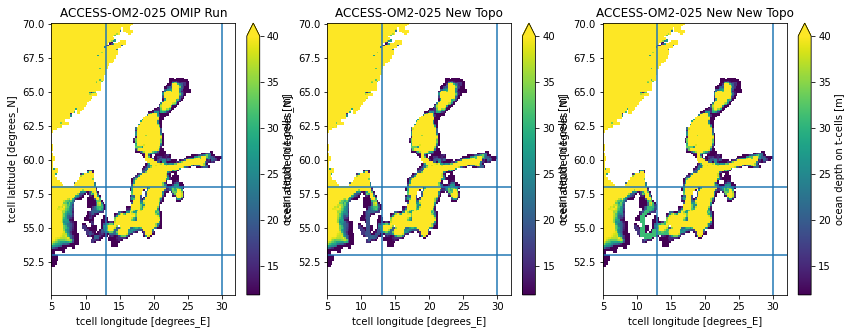

In [9]:
plt.figure(figsize=(14,5))
plt.subplot(131)
ht_OMIP.sel(xt_ocean=slice(lon0,lon3)).sel(yt_ocean=slice(lat0,lat3)).plot(vmax=40)
plt.axhline(lat1)
plt.axhline(lat2)
plt.axvline(lon1)
plt.axvline(lon2)
plt.title('ACCESS-OM2-025 OMIP Run')
plt.subplot(132)
ht_TOPO.sel(xt_ocean=slice(lon0,lon3)).sel(yt_ocean=slice(lat0,lat3)).plot(vmax=40)
plt.axhline(lat1)
plt.axhline(lat2)
plt.axvline(lon1)
plt.axvline(lon2)
plt.title('ACCESS-OM2-025 New Topo')
plt.subplot(133)
ht_TOPO2.sel(xt_ocean=slice(lon0,lon3)).sel(yt_ocean=slice(lat0,lat3)).plot(vmax=40)
plt.axhline(lat1)
plt.axhline(lat2)
plt.axvline(lon1)
plt.axvline(lon2)
plt.title('ACCESS-OM2-025 New New Topo')

In [10]:
salt_OMIP = cc.querying.getvar(expt=expt_OMIP,variable='salt',session=session,frequency='1 monthly')
salt_TOPO = cc.querying.getvar(expt=expt_TOPO,variable='salt',session=session,frequency='1 monthly')
salt_TOPO2 = cc.querying.getvar(expt=expt_TOPO2,variable='salt',session=session,frequency='1 monthly')

In [11]:
salt_TOPO2.time

<xarray.DataArray 'time' (time: 336)>
array(['1958-01-14T12:00:00.000000000', '1958-02-13T00:00:00.000000000',
       '1958-03-14T12:00:00.000000000', ..., '1985-10-14T12:00:00.000000000',
       '1985-11-14T00:00:00.000000000', '1985-12-14T12:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1958-01-14T12:00:00 ... 1985-12-14T12:00:00
Attributes:
    long_name:       time
    cartesian_axis:  T
    calendar_type:   GREGORIAN
    bounds:          time_bounds

Text(0.5, 1.0, 'Baltic Salinity: ACCESS-OM2-025 New New Topo')

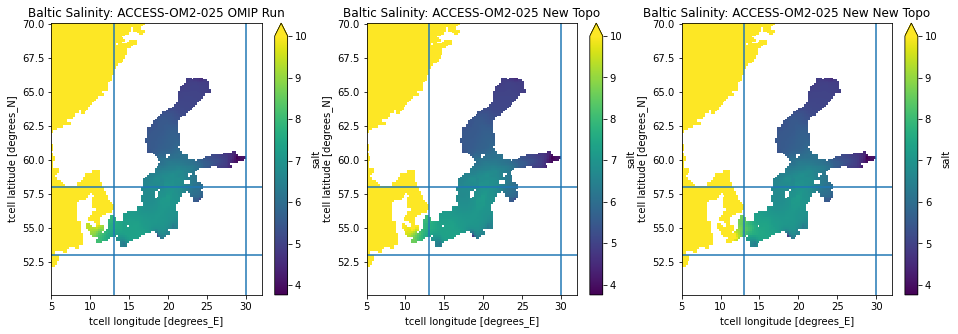

In [12]:
plt.figure(figsize=(16,5))
plt.subplot(131)
salt_OMIP.mean('st_ocean').sel(time=slice(start_time,end_time)).mean('time').sel(xt_ocean=slice(lon0,lon3)).sel(yt_ocean=slice(lat0,lat3)).plot(vmax=10)
plt.axhline(lat1)
plt.axhline(lat2)
plt.axvline(lon1)
plt.axvline(lon2)
plt.title('Baltic Salinity: ACCESS-OM2-025 OMIP Run')
plt.subplot(132)
salt_TOPO.mean('st_ocean').sel(time=slice(start_time,end_time)).mean('time').sel(xt_ocean=slice(lon0,lon3)).sel(yt_ocean=slice(lat0,lat3)).plot(vmax=10)
plt.axhline(lat1)
plt.axhline(lat2)
plt.axvline(lon1)
plt.axvline(lon2)
plt.title('Baltic Salinity: ACCESS-OM2-025 New Topo')
plt.subplot(133)
salt_TOPO2.mean('st_ocean').sel(time=slice(start_time,end_time)).mean('time').sel(xt_ocean=slice(lon0,lon3)).sel(yt_ocean=slice(lat0,lat3)).plot(vmax=10)
plt.axhline(lat1)
plt.axhline(lat2)
plt.axvline(lon1)
plt.axvline(lon2)
plt.title('Baltic Salinity: ACCESS-OM2-025 New New Topo')

In [13]:
salt_flux_restore_OMIP = cc.querying.getvar(expt=expt_OMIP,variable='sfc_salt_flux_restore',session=session,frequency='1 monthly')
salt_flux_restore_TOPO = cc.querying.getvar(expt=expt_TOPO,variable='sfc_salt_flux_restore',session=session,frequency='1 monthly')
salt_flux_restore_TOPO2 = cc.querying.getvar(expt=expt_TOPO2,variable='sfc_salt_flux_restore',session=session,frequency='1 monthly')

Mean salt_restore in OMIP run is 63731.4 kg/s
Mean salt_restore in New Topo run is 61268.3 kg/s
Mean salt_restore in New Topo run is 54406.8 kg/s


Text(0.5, 1.0, 'Baltic Salinity Restoring')

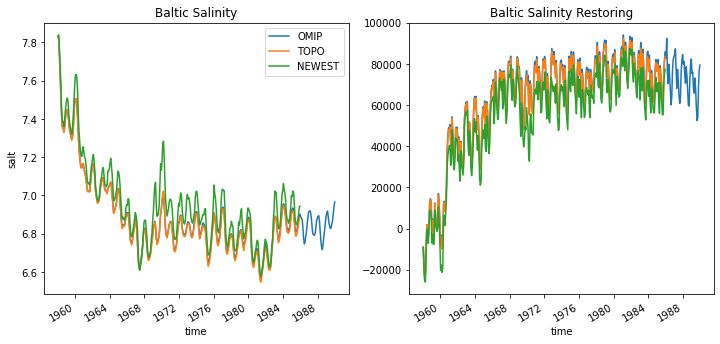

In [14]:
plt.figure(figsize=(12,5))
plt.subplot(121)
salt_OMIP.mean('st_ocean').sel(time=slice(start_time,end_time)).sel(xt_ocean=slice(lon1,lon2)).mean('xt_ocean').sel(yt_ocean=slice(lat1,lat2)).mean('yt_ocean').plot(label='OMIP')
salt_TOPO.mean('st_ocean').sel(time=slice(start_time,end_time)).sel(xt_ocean=slice(lon1,lon2)).mean('xt_ocean').sel(yt_ocean=slice(lat1,lat2)).mean('yt_ocean').plot(label='TOPO')
salt_TOPO2.mean('st_ocean').sel(time=slice(start_time,end_time)).sel(xt_ocean=slice(lon1,lon2)).mean('xt_ocean').sel(yt_ocean=slice(lat1,lat2)).mean('yt_ocean').plot(label='NEWEST')
plt.title('Baltic Salinity')
plt.legend()
plt.subplot(122)
salt_restore_OMIP = (salt_flux_restore_OMIP*area_t_OM2).sel(time=slice(start_time,end_time)).sel(xt_ocean=slice(lon1,lon2)).sum('xt_ocean').sel(yt_ocean=slice(lat1,lat2)).sum('yt_ocean')
salt_restore_OMIP.plot(label='OMIP')
print('Mean salt_restore in OMIP run is %g kg/s'% salt_restore_OMIP.mean('time'))
salt_restore_TOPO = (salt_flux_restore_TOPO*area_t_OM2).sel(time=slice(start_time,end_time)).sel(xt_ocean=slice(lon1,lon2)).sum('xt_ocean').sel(yt_ocean=slice(lat1,lat2)).sum('yt_ocean')
salt_restore_TOPO.plot(label='TOPO')
print('Mean salt_restore in New Topo run is %g kg/s'% salt_restore_TOPO.mean('time'))
salt_restore_TOPO2 = (salt_flux_restore_TOPO2*area_t_OM2).sel(time=slice(start_time,end_time)).sel(xt_ocean=slice(lon1,lon2)).sum('xt_ocean').sel(yt_ocean=slice(lat1,lat2)).sum('yt_ocean')
salt_restore_TOPO2.plot(label='NEWEST')
print('Mean salt_restore in New Topo run is %g kg/s'% salt_restore_TOPO2.mean('time'))
plt.title('Baltic Salinity Restoring')

## Mediterranean

In [15]:
lat0=30  # map edge
lat1=31  # average edge
lat2=41  # average edge
lat3=47  # map edge
lon0=-10
lon1=0
lon2=35
lon3=42

Text(0.5, 1.0, 'ACCESS-OM2-025 New New Topo')

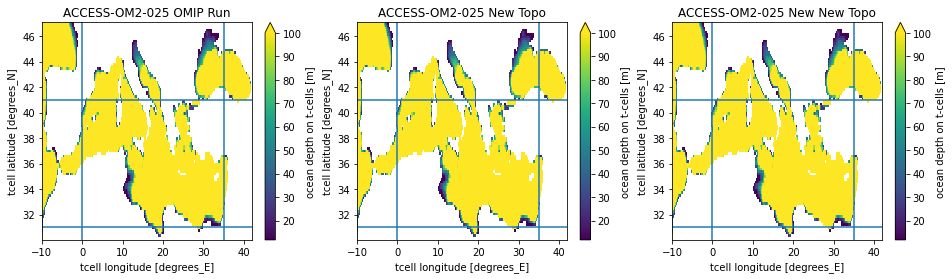

In [17]:
plt.figure(figsize=(16,4))
plt.subplot(131)
ht_OMIP.sel(xt_ocean=slice(lon0,lon3)).sel(yt_ocean=slice(lat0,lat3)).plot(vmax=100)
plt.axhline(lat1)
plt.axhline(lat2)
plt.axvline(lon1)
plt.axvline(lon2)
plt.title('ACCESS-OM2-025 OMIP Run')
plt.subplot(132)
ht_TOPO.sel(xt_ocean=slice(lon0,lon3)).sel(yt_ocean=slice(lat0,lat3)).plot(vmax=100)
plt.axhline(lat1)
plt.axhline(lat2)
plt.axvline(lon1)
plt.axvline(lon2)
plt.title('ACCESS-OM2-025 New Topo')
plt.subplot(133)
ht_TOPO.sel(xt_ocean=slice(lon0,lon3)).sel(yt_ocean=slice(lat0,lat3)).plot(vmax=100)
plt.axhline(lat1)
plt.axhline(lat2)
plt.axvline(lon1)
plt.axvline(lon2)
plt.title('ACCESS-OM2-025 New New Topo')

Text(0.5, 1.0, 'Med Salinity: ACCESS-OM2-025 New New Topo')

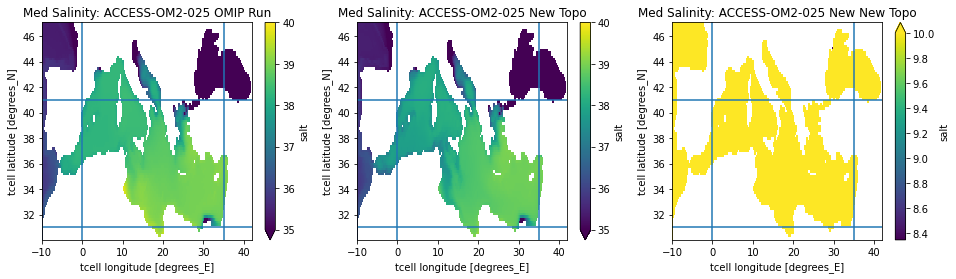

In [18]:
plt.figure(figsize=(16,4))
plt.subplot(131)
salt_OMIP.mean('st_ocean').sel(time=slice(start_time,end_time)).mean('time').sel(xt_ocean=slice(lon0,lon3)).sel(yt_ocean=slice(lat0,lat3)).plot(vmin=35,vmax=40)
plt.axhline(lat1)
plt.axhline(lat2)
plt.axvline(lon1)
plt.axvline(lon2)
plt.title('Med Salinity: ACCESS-OM2-025 OMIP Run')
plt.subplot(132)
salt_TOPO.mean('st_ocean').sel(time=slice(start_time,end_time)).mean('time').sel(xt_ocean=slice(lon0,lon3)).sel(yt_ocean=slice(lat0,lat3)).plot(vmin=35,vmax=40)
plt.axhline(lat1)
plt.axhline(lat2)
plt.axvline(lon1)
plt.axvline(lon2)
plt.title('Med Salinity: ACCESS-OM2-025 New Topo')
plt.subplot(133)
salt_TOPO2.mean('st_ocean').sel(time=slice(start_time,end_time)).mean('time').sel(xt_ocean=slice(lon0,lon3)).sel(yt_ocean=slice(lat0,lat3)).plot(vmax=10)
plt.axhline(lat1)
plt.axhline(lat2)
plt.axvline(lon1)
plt.axvline(lon2)
plt.title('Med Salinity: ACCESS-OM2-025 New New Topo')

Mean salt_restore in OMIP run is -575108 kg/s
Mean salt_restore in New Topo run is 38277.6 kg/s
Mean salt_restore in New Topo run is 40329 kg/s


Text(0.5, 1.0, 'Med Salinity Restoring')

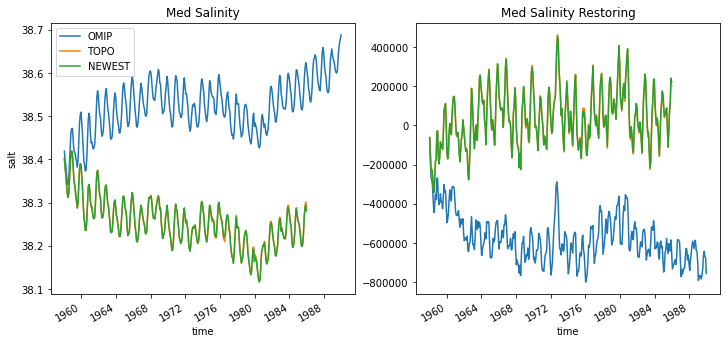

In [19]:
plt.figure(figsize=(12,5))
plt.subplot(121)
salt_OMIP.mean('st_ocean').sel(time=slice(start_time,end_time)).sel(xt_ocean=slice(lon1,lon2)).mean('xt_ocean').sel(yt_ocean=slice(lat1,lat2)).mean('yt_ocean').plot(label='OMIP')
salt_TOPO.mean('st_ocean').sel(time=slice(start_time,end_time)).sel(xt_ocean=slice(lon1,lon2)).mean('xt_ocean').sel(yt_ocean=slice(lat1,lat2)).mean('yt_ocean').plot(label='TOPO')
salt_TOPO2.mean('st_ocean').sel(time=slice(start_time,end_time)).sel(xt_ocean=slice(lon1,lon2)).mean('xt_ocean').sel(yt_ocean=slice(lat1,lat2)).mean('yt_ocean').plot(label='NEWEST')
plt.title('Med Salinity')
plt.legend()
plt.subplot(122)
salt_restore_OMIP = (salt_flux_restore_OMIP*area_t_OM2).sel(time=slice(start_time,end_time)).sel(xt_ocean=slice(lon1,lon2)).sum('xt_ocean').sel(yt_ocean=slice(lat1,lat2)).sum('yt_ocean')
salt_restore_OMIP.plot(label='OMIP')
print('Mean salt_restore in OMIP run is %g kg/s'% salt_restore_OMIP.mean('time'))
salt_restore_TOPO = (salt_flux_restore_TOPO*area_t_OM2).sel(time=slice(start_time,end_time)).sel(xt_ocean=slice(lon1,lon2)).sum('xt_ocean').sel(yt_ocean=slice(lat1,lat2)).sum('yt_ocean')
salt_restore_TOPO.plot(label='TOPO')
print('Mean salt_restore in New Topo run is %g kg/s'% salt_restore_TOPO.mean('time'))
salt_restore_TOPO2 = (salt_flux_restore_TOPO2*area_t_OM2).sel(time=slice(start_time,end_time)).sel(xt_ocean=slice(lon1,lon2)).sum('xt_ocean').sel(yt_ocean=slice(lat1,lat2)).sum('yt_ocean')
salt_restore_TOPO2.plot(label='NEWEST')
print('Mean salt_restore in New Topo run is %g kg/s'% salt_restore_TOPO2.mean('time'))
plt.title('Med Salinity Restoring')

## Red Sea

In [20]:
lat0=10  # map edge
lat1=12  # average edge
lat2=29  # average edge
lat3=30  # map edge
lon0=30
lon1=33
lon2=44
lon3=55

Text(0.5, 1.0, 'ACCESS-OM2-025 New New Topo')

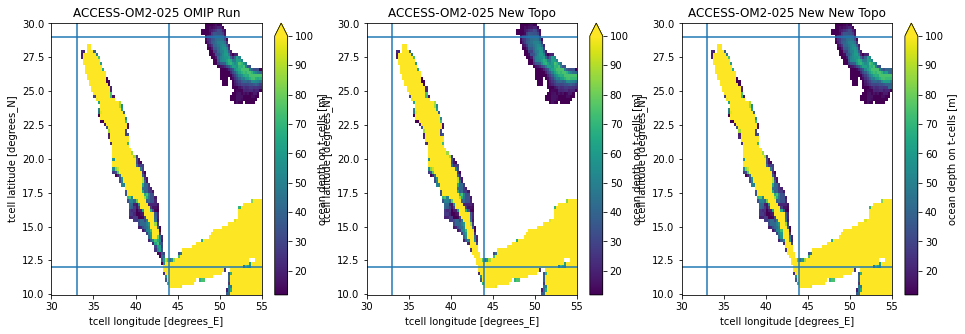

In [21]:
plt.figure(figsize=(16,5))
plt.subplot(131)
ht_OMIP.sel(xt_ocean=slice(lon0,lon3)).sel(yt_ocean=slice(lat0,lat3)).plot(vmax=100)
plt.axhline(lat1)
plt.axhline(lat2)
plt.axvline(lon1)
plt.axvline(lon2)
plt.title('ACCESS-OM2-025 OMIP Run')
plt.subplot(132)
ht_TOPO.sel(xt_ocean=slice(lon0,lon3)).sel(yt_ocean=slice(lat0,lat3)).plot(vmax=100)
plt.axhline(lat1)
plt.axhline(lat2)
plt.axvline(lon1)
plt.axvline(lon2)
plt.title('ACCESS-OM2-025 New Topo')
plt.subplot(133)
ht_TOPO2.sel(xt_ocean=slice(lon0,lon3)).sel(yt_ocean=slice(lat0,lat3)).plot(vmax=100)
plt.axhline(lat1)
plt.axhline(lat2)
plt.axvline(lon1)
plt.axvline(lon2)
plt.title('ACCESS-OM2-025 New New Topo')

Text(0.5, 1.0, 'Red Sea Salinity: ACCESS-OM2-025 New New Topo')

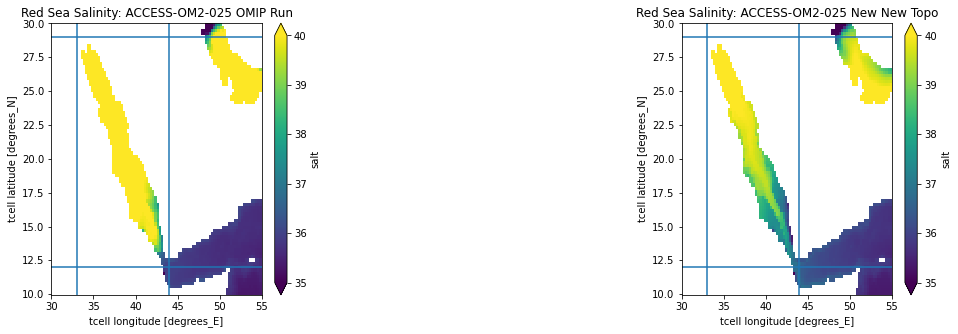

In [22]:
plt.figure(figsize=(16,5))
plt.subplot(131)
salt_OMIP.mean('st_ocean').sel(time=slice(start_time,end_time)).mean('time').sel(xt_ocean=slice(lon0,lon3)).sel(yt_ocean=slice(lat0,lat3)).plot(vmin=35,vmax=40)
plt.axhline(lat1)
plt.axhline(lat2)
plt.axvline(lon1)
plt.axvline(lon2)
plt.title('Red Sea Salinity: ACCESS-OM2-025 OMIP Run')
plt.subplot(122)
salt_TOPO.mean('st_ocean').sel(time=slice(start_time,end_time)).mean('time').sel(xt_ocean=slice(lon0,lon3)).sel(yt_ocean=slice(lat0,lat3)).plot(vmin=35,vmax=40)
plt.axhline(lat1)
plt.axhline(lat2)
plt.axvline(lon1)
plt.axvline(lon2)
plt.title('Red Sea Salinity: ACCESS-OM2-025 New Topo')
plt.subplot(133)
salt_TOPO2.mean('st_ocean').sel(time=slice(start_time,end_time)).mean('time').sel(xt_ocean=slice(lon0,lon3)).sel(yt_ocean=slice(lat0,lat3)).plot(vmin=35,vmax=40)
plt.axhline(lat1)
plt.axhline(lat2)
plt.axvline(lon1)
plt.axvline(lon2)
plt.title('Red Sea Salinity: ACCESS-OM2-025 New New Topo')

Mean salt_restore in OMIP run is -291780 kg/s
Mean salt_restore in New Topo run is -3984.42 kg/s
Mean salt_restore in New Topo run is -3620.4 kg/s


Text(0.5, 1.0, 'Red Sea Salinity Restoring')

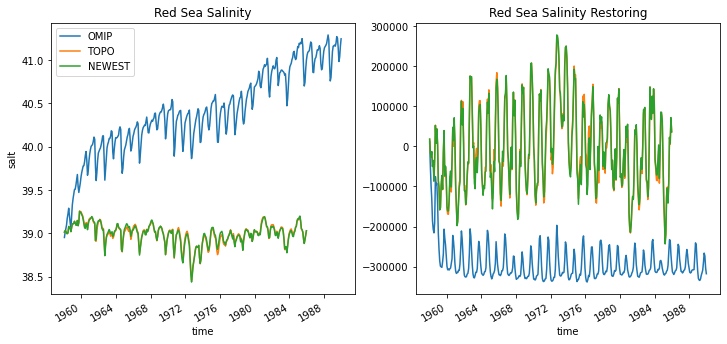

In [23]:
plt.figure(figsize=(12,5))
plt.subplot(121)
salt_OMIP.mean('st_ocean').sel(time=slice(start_time,end_time)).sel(xt_ocean=slice(lon1,lon2)).mean('xt_ocean').sel(yt_ocean=slice(lat1,lat2)).mean('yt_ocean').plot(label='OMIP')
salt_TOPO.mean('st_ocean').sel(time=slice(start_time,end_time)).sel(xt_ocean=slice(lon1,lon2)).mean('xt_ocean').sel(yt_ocean=slice(lat1,lat2)).mean('yt_ocean').plot(label='TOPO')
salt_TOPO2.mean('st_ocean').sel(time=slice(start_time,end_time)).sel(xt_ocean=slice(lon1,lon2)).mean('xt_ocean').sel(yt_ocean=slice(lat1,lat2)).mean('yt_ocean').plot(label='NEWEST')
plt.title('Red Sea Salinity')
plt.legend()
plt.subplot(122)
salt_restore_OMIP = (salt_flux_restore_OMIP*area_t_OM2).sel(time=slice(start_time,end_time)).sel(xt_ocean=slice(lon1,lon2)).sum('xt_ocean').sel(yt_ocean=slice(lat1,lat2)).sum('yt_ocean')
salt_restore_OMIP.plot(label='OMIP')
print('Mean salt_restore in OMIP run is %g kg/s'% salt_restore_OMIP.mean('time'))
salt_restore_TOPO = (salt_flux_restore_TOPO*area_t_OM2).sel(time=slice(start_time,end_time)).sel(xt_ocean=slice(lon1,lon2)).sum('xt_ocean').sel(yt_ocean=slice(lat1,lat2)).sum('yt_ocean')
salt_restore_TOPO.plot(label='TOPO')
print('Mean salt_restore in New Topo run is %g kg/s'% salt_restore_TOPO.mean('time'))
salt_restore_TOPO2 = (salt_flux_restore_TOPO2*area_t_OM2).sel(time=slice(start_time,end_time)).sel(xt_ocean=slice(lon1,lon2)).sum('xt_ocean').sel(yt_ocean=slice(lat1,lat2)).sum('yt_ocean')
salt_restore_TOPO2.plot(label='NEWEST')
print('Mean salt_restore in New Topo run is %g kg/s'% salt_restore_TOPO2.mean('time'))
plt.title('Red Sea Salinity Restoring')

## Persian Gulf

In [24]:
lat0=20  # map edge
lat1=24  # average edge
lat2=31  # average edge
lat3=35  # map edge
lon0=45
lon1=47
lon2=56
lon3=60

Text(0.5, 1.0, 'ACCESS-OM2-025 New New Topo')

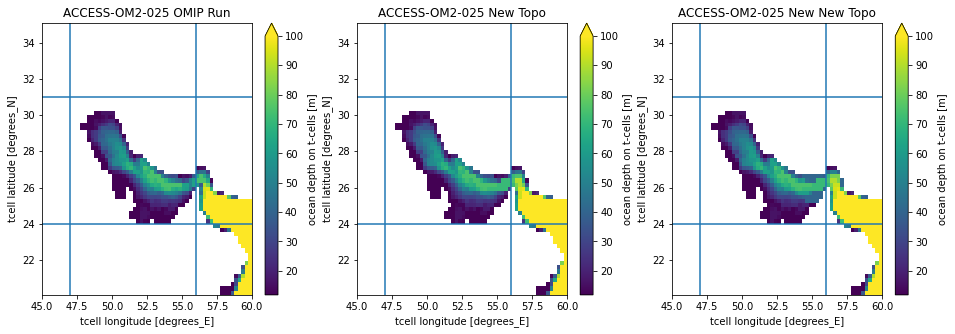

In [25]:
plt.figure(figsize=(16,5))
plt.subplot(131)
ht_OMIP.sel(xt_ocean=slice(lon0,lon3)).sel(yt_ocean=slice(lat0,lat3)).plot(vmax=100)
plt.axhline(lat1)
plt.axhline(lat2)
plt.axvline(lon1)
plt.axvline(lon2)
plt.title('ACCESS-OM2-025 OMIP Run')
plt.subplot(132)
ht_TOPO.sel(xt_ocean=slice(lon0,lon3)).sel(yt_ocean=slice(lat0,lat3)).plot(vmax=100)
plt.axhline(lat1)
plt.axhline(lat2)
plt.axvline(lon1)
plt.axvline(lon2)
plt.title('ACCESS-OM2-025 New Topo')
plt.subplot(133)
ht_TOPO2.sel(xt_ocean=slice(lon0,lon3)).sel(yt_ocean=slice(lat0,lat3)).plot(vmax=100)
plt.axhline(lat1)
plt.axhline(lat2)
plt.axvline(lon1)
plt.axvline(lon2)
plt.title('ACCESS-OM2-025 New New Topo')

Text(0.5, 1.0, 'Persian Gulf Salinity: ACCESS-OM2-025 New New Topo')

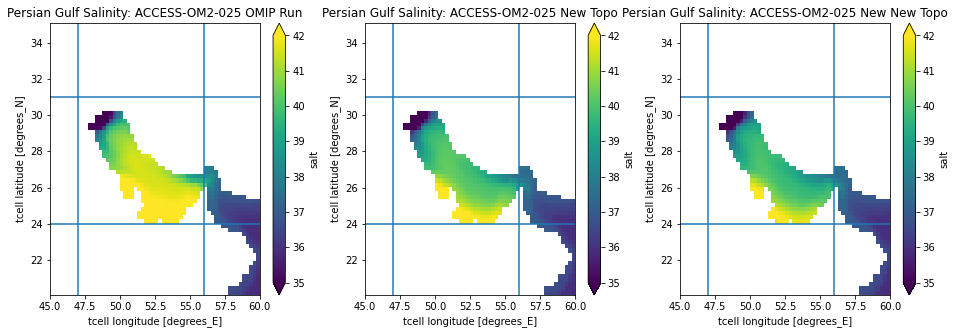

In [26]:
plt.figure(figsize=(16,5))
plt.subplot(131)
salt_OMIP.mean('st_ocean').sel(time=slice(start_time,end_time)).mean('time').sel(xt_ocean=slice(lon0,lon3)).sel(yt_ocean=slice(lat0,lat3)).plot(vmin=35,vmax=42)
plt.axhline(lat1)
plt.axhline(lat2)
plt.axvline(lon1)
plt.axvline(lon2)
plt.title('Persian Gulf Salinity: ACCESS-OM2-025 OMIP Run')
plt.subplot(132)
salt_TOPO.mean('st_ocean').sel(time=slice(start_time,end_time)).mean('time').sel(xt_ocean=slice(lon0,lon3)).sel(yt_ocean=slice(lat0,lat3)).plot(vmin=35,vmax=42)
plt.axhline(lat1)
plt.axhline(lat2)
plt.axvline(lon1)
plt.axvline(lon2)
plt.title('Persian Gulf Salinity: ACCESS-OM2-025 New Topo')
plt.subplot(133)
salt_TOPO2.mean('st_ocean').sel(time=slice(start_time,end_time)).mean('time').sel(xt_ocean=slice(lon0,lon3)).sel(yt_ocean=slice(lat0,lat3)).plot(vmin=35,vmax=42)
plt.axhline(lat1)
plt.axhline(lat2)
plt.axvline(lon1)
plt.axvline(lon2)
plt.title('Persian Gulf Salinity: ACCESS-OM2-025 New New Topo')

Mean salt_restore in OMIP run is -104097 kg/s
Mean salt_restore in New Topo run is -65657.7 kg/s
Mean salt_restore in New Topo run is -43976.3 kg/s


Text(0.5, 1.0, 'Persian Gulf Salinity Restoring')

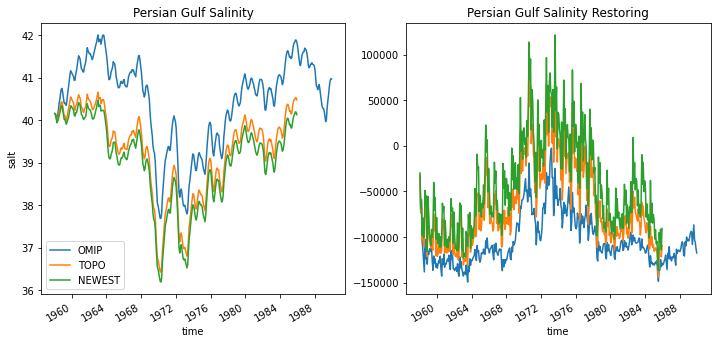

In [27]:
plt.figure(figsize=(12,5))
plt.subplot(121)
salt_OMIP.mean('st_ocean').sel(time=slice(start_time,end_time)).sel(xt_ocean=slice(lon1,lon2)).mean('xt_ocean').sel(yt_ocean=slice(lat1,lat2)).mean('yt_ocean').plot(label='OMIP')
salt_TOPO.mean('st_ocean').sel(time=slice(start_time,end_time)).sel(xt_ocean=slice(lon1,lon2)).mean('xt_ocean').sel(yt_ocean=slice(lat1,lat2)).mean('yt_ocean').plot(label='TOPO')
salt_TOPO2.mean('st_ocean').sel(time=slice(start_time,end_time)).sel(xt_ocean=slice(lon1,lon2)).mean('xt_ocean').sel(yt_ocean=slice(lat1,lat2)).mean('yt_ocean').plot(label='NEWEST')
plt.title('Persian Gulf Salinity')
plt.legend()
plt.subplot(122)
salt_restore_OMIP = (salt_flux_restore_OMIP*area_t_OM2).sel(time=slice(start_time,end_time)).sel(xt_ocean=slice(lon1,lon2)).sum('xt_ocean').sel(yt_ocean=slice(lat1,lat2)).sum('yt_ocean')
salt_restore_OMIP.plot(label='OMIP')
print('Mean salt_restore in OMIP run is %g kg/s'% salt_restore_OMIP.mean('time'))
salt_restore_TOPO = (salt_flux_restore_TOPO*area_t_OM2).sel(time=slice(start_time,end_time)).sel(xt_ocean=slice(lon1,lon2)).sum('xt_ocean').sel(yt_ocean=slice(lat1,lat2)).sum('yt_ocean')
salt_restore_TOPO.plot(label='TOPO')
print('Mean salt_restore in New Topo run is %g kg/s'% salt_restore_TOPO.mean('time'))
salt_restore_TOPO2 = (salt_flux_restore_TOPO2*area_t_OM2).sel(time=slice(start_time,end_time)).sel(xt_ocean=slice(lon1,lon2)).sum('xt_ocean').sel(yt_ocean=slice(lat1,lat2)).sum('yt_ocean')
salt_restore_TOPO2.plot(label='NEWEST')
print('Mean salt_restore in New Topo run is %g kg/s'% salt_restore_TOPO2.mean('time'))
plt.title('Persian Gulf Salinity Restoring')

## White Sea

In [28]:
lat0=60  # map edge
lat1=63  # average edge
lat2=68  # average edge
lat3=75  # map edge
lon0=30
lon1=31
lon2=41
lon3=45

Text(0.5, 1.0, 'ACCESS-OM2-025 New New Topo')

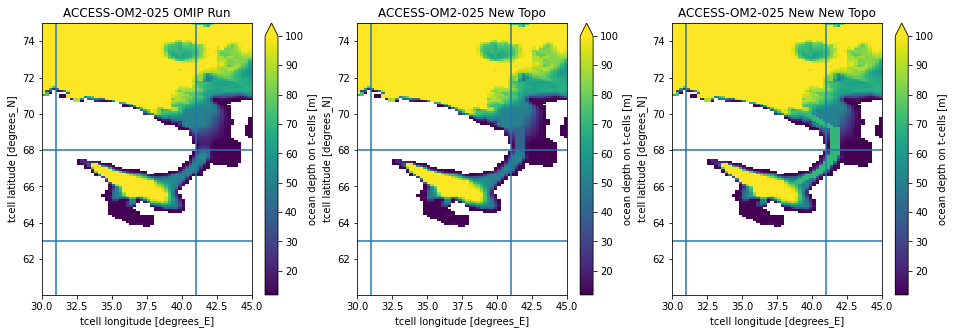

In [29]:
plt.figure(figsize=(16,5))
plt.subplot(131)
ht_OMIP.sel(xt_ocean=slice(lon0,lon3)).sel(yt_ocean=slice(lat0,lat3)).plot(vmax=100)
plt.axhline(lat1)
plt.axhline(lat2)
plt.axvline(lon1)
plt.axvline(lon2)
plt.title('ACCESS-OM2-025 OMIP Run')
plt.subplot(132)
ht_TOPO.sel(xt_ocean=slice(lon0,lon3)).sel(yt_ocean=slice(lat0,lat3)).plot(vmax=100)
plt.axhline(lat1)
plt.axhline(lat2)
plt.axvline(lon1)
plt.axvline(lon2)
plt.title('ACCESS-OM2-025 New Topo')
plt.subplot(133)
ht_TOPO2.sel(xt_ocean=slice(lon0,lon3)).sel(yt_ocean=slice(lat0,lat3)).plot(vmax=100)
plt.axhline(lat1)
plt.axhline(lat2)
plt.axvline(lon1)
plt.axvline(lon2)
plt.title('ACCESS-OM2-025 New New Topo')

Text(0.5, 1.0, 'White Sea Salinity: ACCESS-OM2-025 New New Topo')

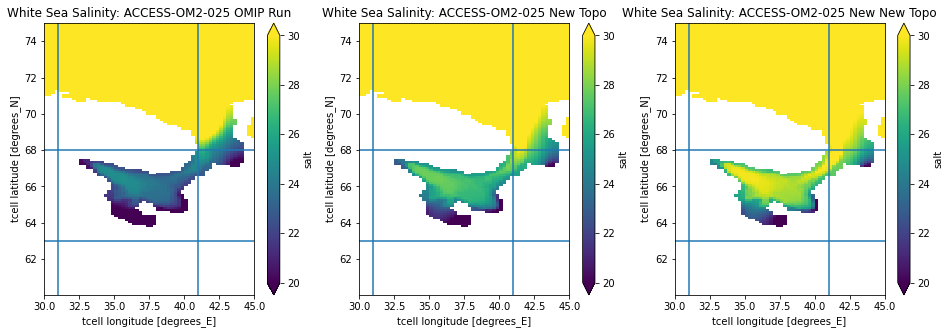

In [30]:
plt.figure(figsize=(16,5))
plt.subplot(131)
salt_OMIP.mean('st_ocean').sel(time=slice(start_time,end_time)).mean('time').sel(xt_ocean=slice(lon0,lon3)).sel(yt_ocean=slice(lat0,lat3)).plot(vmin=20,vmax=30)
plt.axhline(lat1)
plt.axhline(lat2)
plt.axvline(lon1)
plt.axvline(lon2)
plt.title('White Sea Salinity: ACCESS-OM2-025 OMIP Run')
plt.subplot(132)
salt_TOPO.mean('st_ocean').sel(time=slice(start_time,end_time)).mean('time').sel(xt_ocean=slice(lon0,lon3)).sel(yt_ocean=slice(lat0,lat3)).plot(vmin=20,vmax=30)
plt.axhline(lat1)
plt.axhline(lat2)
plt.axvline(lon1)
plt.axvline(lon2)
plt.title('White Sea Salinity: ACCESS-OM2-025 New Topo')
plt.subplot(133)
salt_TOPO2.mean('st_ocean').sel(time=slice(start_time,end_time)).mean('time').sel(xt_ocean=slice(lon0,lon3)).sel(yt_ocean=slice(lat0,lat3)).plot(vmin=20,vmax=30)
plt.axhline(lat1)
plt.axhline(lat2)
plt.axvline(lon1)
plt.axvline(lon2)
plt.title('White Sea Salinity: ACCESS-OM2-025 New New Topo')

Mean salt_restore in OMIP run is 37472.6 kg/s
Mean salt_restore in New Topo run is 27645.6 kg/s
Mean salt_restore in New Topo run is 7037.29 kg/s


Text(0.5, 1.0, 'White Sea Salinity Restoring')

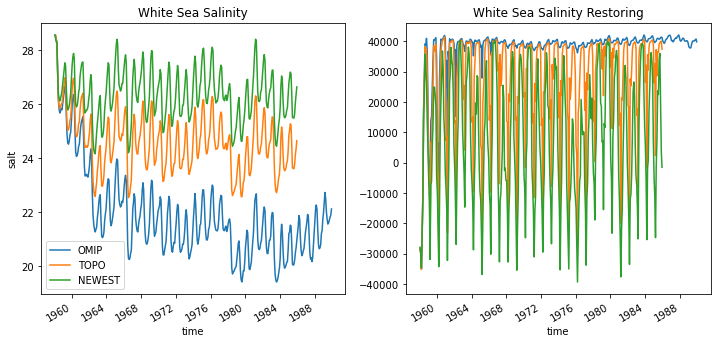

In [31]:
plt.figure(figsize=(12,5))
plt.subplot(121)
salt_OMIP.mean('st_ocean').sel(time=slice(start_time,end_time)).sel(xt_ocean=slice(lon1,lon2)).mean('xt_ocean').sel(yt_ocean=slice(lat1,lat2)).mean('yt_ocean').plot(label='OMIP')
salt_TOPO.mean('st_ocean').sel(time=slice(start_time,end_time)).sel(xt_ocean=slice(lon1,lon2)).mean('xt_ocean').sel(yt_ocean=slice(lat1,lat2)).mean('yt_ocean').plot(label='TOPO')
salt_TOPO2.mean('st_ocean').sel(time=slice(start_time,end_time)).sel(xt_ocean=slice(lon1,lon2)).mean('xt_ocean').sel(yt_ocean=slice(lat1,lat2)).mean('yt_ocean').plot(label='NEWEST')
plt.title('White Sea Salinity')
plt.legend()
plt.subplot(122)
salt_restore_OMIP = (salt_flux_restore_OMIP*area_t_OM2).sel(time=slice(start_time,end_time)).sel(xt_ocean=slice(lon1,lon2)).sum('xt_ocean').sel(yt_ocean=slice(lat1,lat2)).sum('yt_ocean')
salt_restore_OMIP.plot(label='OMIP')
print('Mean salt_restore in OMIP run is %g kg/s'% salt_restore_OMIP.mean('time'))
salt_restore_TOPO = (salt_flux_restore_TOPO*area_t_OM2).sel(time=slice(start_time,end_time)).sel(xt_ocean=slice(lon1,lon2)).sum('xt_ocean').sel(yt_ocean=slice(lat1,lat2)).sum('yt_ocean')
salt_restore_TOPO.plot(label='TOPO')
print('Mean salt_restore in New Topo run is %g kg/s'% salt_restore_TOPO.mean('time'))
salt_restore_TOPO2 = (salt_flux_restore_TOPO2*area_t_OM2).sel(time=slice(start_time,end_time)).sel(xt_ocean=slice(lon1,lon2)).sum('xt_ocean').sel(yt_ocean=slice(lat1,lat2)).sum('yt_ocean')
salt_restore_TOPO2.plot(label='NEWEST')
print('Mean salt_restore in New Topo run is %g kg/s'% salt_restore_TOPO2.mean('time'))
plt.title('White Sea Salinity Restoring')